In [0]:
import os
if not os.path.exists('MODEL'):
    os.makedirs('MODEL')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=44353b8f9c04b5120414eb7345013a5cfdbe384a471e798ac57d9080350b8db2
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 158.7 MB
GPU RAM Free: 7611MB | Used: 0MB | Util   0% | Total 7611MB


In [0]:
import zipfile, os

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/creditcardfraud.zip", 'r')
zip_ref.extractall("MODEL/")
zip_ref.close()

In [3]:
# Reading data and importing required libraries
import pandas as pd
import io
link="https://drive.google.com/open?id=1b1_4UU7M2Rk0zQJRy0oGPYphmJ2lKYfb"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1b1_4UU7M2Rk0zQJRy0oGPYphmJ2lKYfb


In [0]:
#df = pd.read_csv('creditcard.csv')
# Reading data and importing required libraries

df = pd.read_csv('/content/drive/My Drive/creditcard.csv')


In [7]:
df.head()   

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Checking the value count of each of the classes

classes=df['Class'].value_counts()
normal = classes[0]
fraud = classes[1]
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal,normal_share,fraud,fraud_share))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['normal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud|| 1: Fraud)')

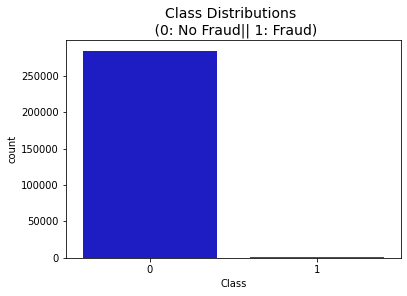

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class',data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud|| 1: Fraud)', fontsize=14)

In [13]:
# normalize the Amount variable which is the only variable that has not been normalized yet
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [0]:
X = df.drop(labels='Class', axis=1) # Drop the dependent variable-Class
y = df.loc[:,'Class']  

In [0]:
# Train-test-split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
405
87


In [0]:
# Removing the skew in the train data using Power Transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
                     
X_train_pt = pt.fit_transform(X_train)     ## Fit the PT on training data
X_test_pt = pt.transform(X_test)       ## Then apply on all data

In [18]:
X_train_pt

array([[ 0.80123191, -0.42290166, -0.10033023, ..., -0.25236906,
        -0.03426719, -0.11199613],
       [ 0.4812117 , -0.20783426,  0.83869617, ...,  0.21477298,
         0.12082274,  0.12788175],
       [-0.81242112,  0.35273948,  2.09282464, ...,  0.12965801,
         0.32374681, -0.3287767 ],
       ...,
       [-0.81882582,  1.1589762 ,  1.24771611, ..., -0.4132611 ,
         0.10631769, -0.81105319],
       [ 1.14660555, -0.51183267, -0.20775411, ..., -0.02780503,
        -0.04890229,  1.00604041],
       [-0.62637927,  0.25050663,  2.30027127, ..., -0.95556939,
        -0.62584511,  0.46714989]])

In [19]:
 from scipy.stats import skew
skew(X_train_pt)

array([-0.21847059,  0.35585777, -0.08023246,  0.01838077, -1.31931435,
       -1.91944305,  3.01121725,  2.29044439, -0.05585206, -1.36124931,
        0.06192312,  0.16618811,  0.00646584,  0.11917419,  0.01392376,
        0.16524297, -0.77111032, -0.06061671,  0.01686442, -1.0442213 ,
       -2.01149602, -0.02002016, -0.31488418,  0.11269476,  0.08240787,
       -0.02399825,  4.03647244,  0.76500066,  0.70733555])

In [20]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train_pt.shape, X_test_pt.shape, '\n')

X_shapes:
 X_train: X_validation:
 (227845, 29) (56962, 29) 



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### LOGISTIC REGRESSION ON UNSAMPLED DATA

In [0]:
# Fitting a logistic regression model on the power transformed data
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(X_train_pt, y_train)

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
scores = cross_val_score(LGR, X_train_pt, y_train, cv=5,scoring = 'roc_auc')
scores.mean()

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.977249514727531

In [0]:
y_pred = LGR.predict(X_test_pt)

In [0]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_val = auc(false_positive_rate, true_positive_rate)
print (roc_auc_val)

0.7872859921687507


In [0]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [0]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))


In [0]:
classification_eval(LGR, X_test_pt, y_test)

CONFUSION MATRIX
[[56842    33]
 [   48    39]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99916   0.99942   0.99929     56875
           1    0.54167   0.44828   0.49057        87

    accuracy                        0.99858     56962
   macro avg    0.77041   0.72385   0.74493     56962
weighted avg    0.99846   0.99858   0.99851     56962

SCALAR METRICS
          MCC = 0.49206
        AUPRC = 0.51573
        AUROC = 0.92899
Cohen's kappa = 0.48986
     Accuracy = 0.99858


RANDOM FOREST ON UNSAMPLED DATA

In [0]:
from sklearn.ensemble import RandomForestClassifier
RDF = RandomForestClassifier(random_state=0)
RDF.fit(X_train_pt, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred = RDF.predict(X_test_pt)

In [0]:
classification_eval(RDF, X_test_pt, y_test)

CONFUSION MATRIX
[[56870     5]
 [   22    65]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99961   0.99991   0.99976     56875
           1    0.92857   0.74713   0.82803        87

    accuracy                        0.99953     56962
   macro avg    0.96409   0.87352   0.91389     56962
weighted avg    0.99950   0.99953   0.99950     56962

SCALAR METRICS
          MCC = 0.83270
        AUPRC = 0.77906
        AUROC = 0.94054
Cohen's kappa = 0.82779
     Accuracy = 0.99953


In [0]:
from sklearn.svm import SVC

### HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION ON UNSAMPLED DATA

In [0]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'C': np.power(10.0,np.arange(-3,3)), 'penalty': ['l1','l2']}

LGR = LogisticRegression()

logit_grid = GridSearchCV(LGR,param_grid = param_grid,cv = kfold,scoring = 'roc_auc',verbose = True, n_jobs = -1)

best_logit = logit_grid.fit(X_train_pt,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   30.4s finished


In [0]:
best_logit.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
best_logit.best_score_

0.9772052214014929

In [0]:
classification_eval(best_logit,X_test_pt,y_test)

CONFUSION MATRIX
[[56868     7]
 [   37    50]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99935   0.99988   0.99961     56875
           1    0.87719   0.57471   0.69444        87

    accuracy                        0.99923     56962
   macro avg    0.93827   0.78729   0.84703     56962
weighted avg    0.99916   0.99923   0.99915     56962

SCALAR METRICS
          MCC = 0.70968
        AUPRC = 0.69542
        AUROC = 0.98769
Cohen's kappa = 0.69407
     Accuracy = 0.99923


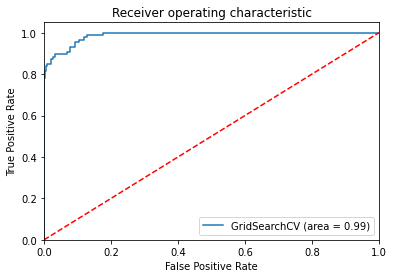

In [0]:
probs = best_logit.predict_proba(X_test_pt)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix,roc_auc_score

## HYPER PARAMETER TUNING FOR RANDOM FOREST ON UNSAMPLED DATA

In [0]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
clf = RandomForestClassifier(n_jobs=-1)

param_grid = { 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15],
    'max_features': ['auto','sqrt']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'roc_auc_score': make_scorer(roc_auc_score)
}

In [0]:
#from sklearn.model_selection import StratifiedKFold,GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#n_estimators = [100,300,500,800,1200]
#max_features = ['auto','sqrt']
#max_depth = [5, 8, 15, 25, 30]

#param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth}

#RDF = RandomForestClassifier(random_state=0)

rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid,scoring = scorers,refit = 'roc_auc_score',cv = kfold, verbose=2, n_jobs = -1)

best_rf = rf_grid.fit(X_train_pt,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 52.4min finished


In [0]:
best_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
best_rf.best_score_

0.8925420298454639

In [0]:
y_pred = best_rf.predict(X_test_pt)

In [0]:
classification_eval(best_rf,X_test_pt,y_test)

CONFUSION MATRIX
[[56870     5]
 [   22    65]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99961   0.99991   0.99976     56875
           1    0.92857   0.74713   0.82803        87

    accuracy                        0.99953     56962
   macro avg    0.96409   0.87352   0.91389     56962
weighted avg    0.99950   0.99953   0.99950     56962

SCALAR METRICS
          MCC = 0.83270
        AUPRC = 0.79988
        AUROC = 0.98493
Cohen's kappa = 0.82779
     Accuracy = 0.99953


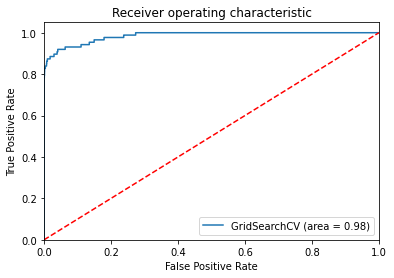

In [0]:
probs = best_rf.predict_proba(X_test_pt)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
print(roc_auc)

0.9849314639383605


## KNN on UNSAMPLED DATA

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_pt, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = model.predict(X_test_pt)

In [0]:
classification_eval(model,X_test_pt,y_test)

CONFUSION MATRIX
[[56867     8]
 [   27    60]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99953   0.99986   0.99969     56875
           1    0.88235   0.68966   0.77419        87

    accuracy                        0.99939     56962
   macro avg    0.94094   0.84476   0.88694     56962
weighted avg    0.99935   0.99939   0.99935     56962

SCALAR METRICS
          MCC = 0.77979
        AUPRC = 0.75057
        AUROC = 0.90788
Cohen's kappa = 0.77389
     Accuracy = 0.99939


Note: KNN was hyperparameter tuned in a separate kernel and the ROC didn't go beyond 92% . The screenshots couldn't be attached here, but KNN wasn't considered for further steps because the ROC is significantly lower compared to the rest of the models and takes an extremely long time to train on the data. Not an ideal model for this business scenario of fraud detection


# XGB training on unsampled data

In [0]:
# We train XGB by starting with a guestimate of the parameters learning rate and n_estimators. We then use early stopping to identify 
#the best learning rate
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=300,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [68]:
eval_set = [(X_train_pt, y_train), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb1.fit(X_train_pt,y_train, early_stopping_rounds=15, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.00043	validation_0-logloss:0.683507	validation_1-error:0.000509	validation_1-logloss:0.68322
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.000492	validation_0-logloss:0.673471	validation_1-error:0.000667	validation_1-logloss:0.673469
[2]	validation_0-error:0.000408	validation_0-logloss:0.664078	validation_1-error:0.000527	validation_1-logloss:0.664023
[3]	validation_0-error:0.000391	validation_0-logloss:0.654609	validation_1-error:0.000544	validation_1-logloss:0.654463
[4]	validation_0-error:0.000386	validation_0-logloss:0.645007	validation_1-error:0.000527	validation_1-logloss:0.645493
[5]	validation_0-error:0.000395	validation_0-logloss:0.636687	validation_1-error:0.000509	validation_1-logloss:0.636389
[6]	validation_0-error:0.000395	validation_0-logloss:0.627537	validation_1-error:0.000509	validation_1-logloss:0.6275

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
y_pred = xgb1.predict_proba(X_test_pt)

In [70]:
roc_auc = roc_auc_score(y_test,y_pred[:,1])
print(roc_auc)

0.9667303271441202


In [0]:
y_pred = xgb1.predict(X_test_pt)
predictions = [round(value) for value in y_pred]

In [72]:
classification_eval(xgb1,X_test_pt,y_test)

CONFUSION MATRIX
[[56870     5]
 [   21    66]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99963   0.99991   0.99977     56875
           1    0.92958   0.75862   0.83544        87

    accuracy                        0.99954     56962
   macro avg    0.96460   0.87927   0.91761     56962
weighted avg    0.99952   0.99954   0.99952     56962

SCALAR METRICS
    Precision = 0.92958
       Recall = 0.75862
        AUPRC = 0.77631
        AUROC = 0.96673
     Accuracy = 0.99954


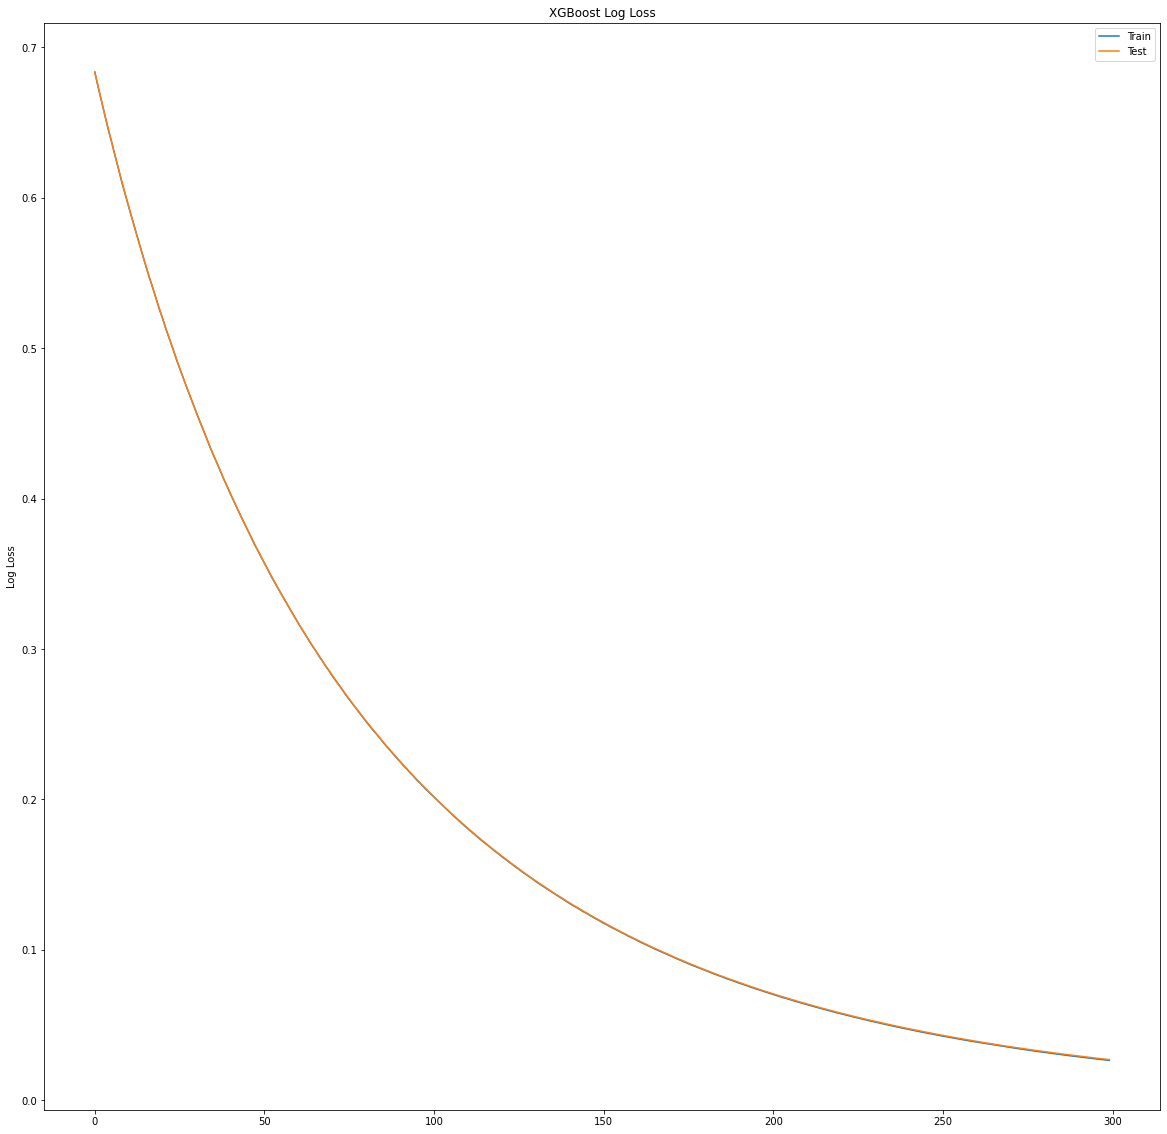

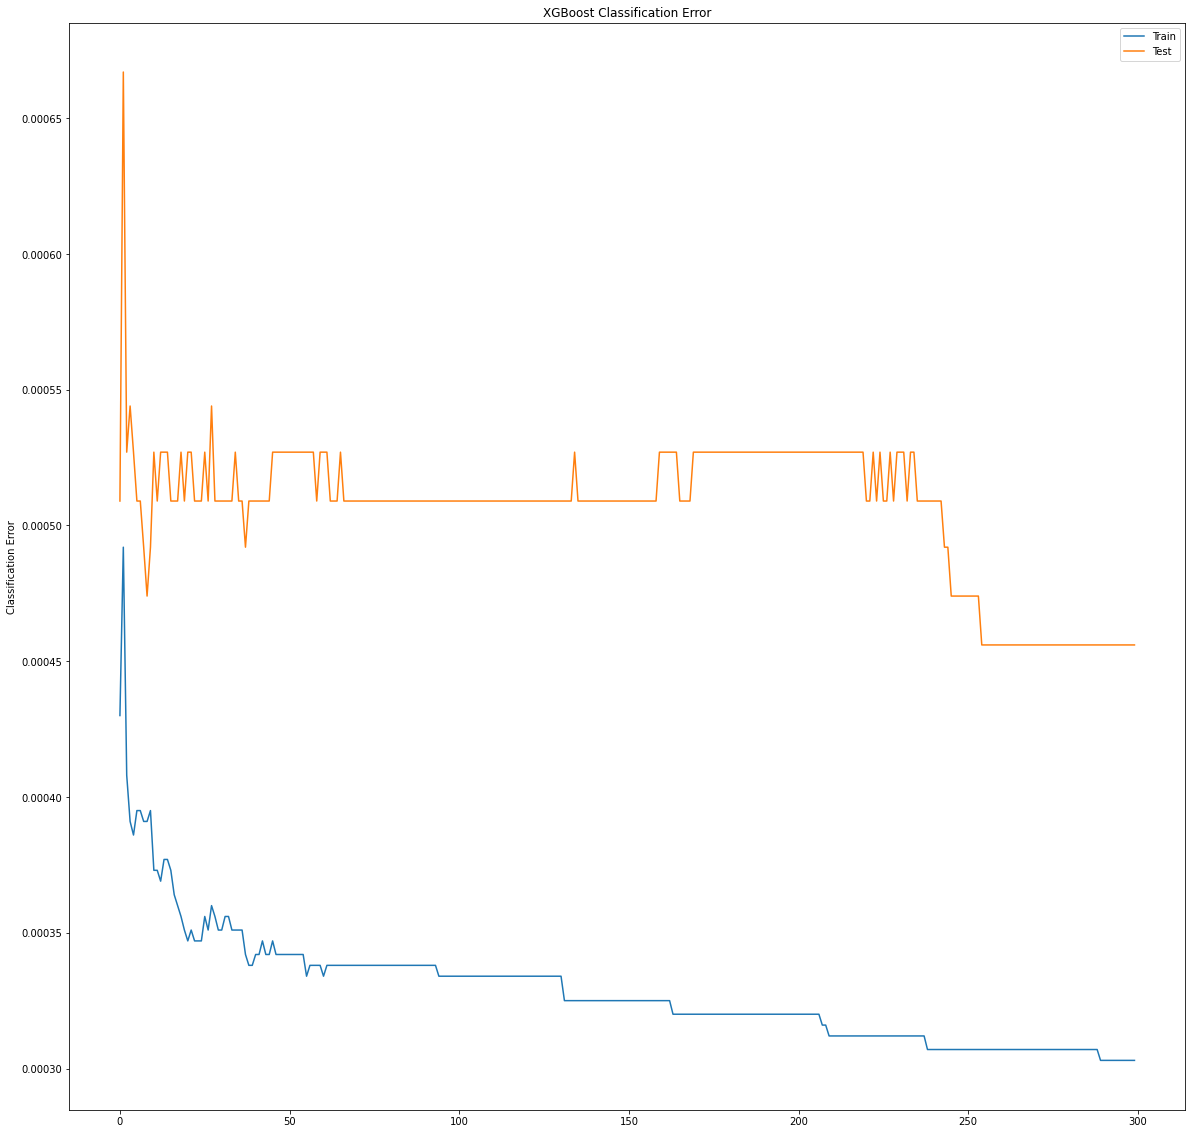

In [73]:
#retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [0]:
# We can see that the training hadn't stopped even at 300 iterations and the classification error curve didn't stabilize. Thus lets increase the learning rate to 0.1
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [75]:
eval_set = [(X_train_pt, y_train), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb2.fit(X_train_pt,y_train, early_stopping_rounds=15, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.00043	validation_0-logloss:0.598121	validation_1-error:0.000509	validation_1-logloss:0.598297
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.000478	validation_0-logloss:0.520288	validation_1-error:0.00072	validation_1-logloss:0.520764
[2]	validation_0-error:0.000369	validation_0-logloss:0.455846	validation_1-error:0.000562	validation_1-logloss:0.455945
[3]	validation_0-error:0.000369	validation_0-logloss:0.400907	validation_1-error:0.000509	validation_1-logloss:0.401209
[4]	validation_0-error:0.000373	validation_0-logloss:0.354139	validation_1-error:0.000492	validation_1-logloss:0.354513
[5]	validation_0-error:0.000382	validation_0-logloss:0.314066	validation_1-error:0.000474	validation_1-logloss:0.314151
[6]	validation_0-error:0.00036	validation_0-logloss:0.279052	validation_1-error:0.000474	validation_1-logloss:0.27926

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

We can see that the training stopped after 96 iterations. Lets look at the Precision and ROC values

In [76]:
classification_eval(xgb2,X_test_pt,y_test)

CONFUSION MATRIX
[[56869     6]
 [   19    68]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99967   0.99989   0.99978     56875
           1    0.91892   0.78161   0.84472        87

    accuracy                        0.99956     56962
   macro avg    0.95929   0.89075   0.92225     56962
weighted avg    0.99954   0.99956   0.99954     56962

SCALAR METRICS
    Precision = 0.91892
       Recall = 0.78161
        AUPRC = 0.81506
        AUROC = 0.98427
     Accuracy = 0.99956


The ROC has increased to 98%. So XGB with 0.1 learning rate and 100 estimators is the optimal model after hyperparameter tuning that gives

### SVM MODEL ON UNSAMPLED DATA

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn import pipeline
from sklearn.kernel_approximation import Nystroem

In [0]:
len(X_train_pt)

227845

In [0]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [0]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
                     
X_train_pt_1 = pt.fit_transform(X_train_1)     ## Fit the PT on training data
X_test_pt_1 = pt.transform(X_test_1)       ## Then apply on all data

In [0]:
feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                               n_components=300)

In [0]:
nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("sgd", SGDClassifier())])

In [0]:
nystroem_approx_svm.fit(X_train_pt_1, y_train_1)

Pipeline(memory=None,
         steps=[('feature_map',
                 Nystroem(coef0=None, degree=None, gamma=0.2, kernel='rbf',
                          kernel_params=None, n_components=300,
                          random_state=1)),
                ('sgd',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [0]:
classification_eval(nystroem_approx_svm,X_test_pt_1,y_test_1)

CONFUSION MATRIX
[[56864     0]
 [   98     0]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99828   1.00000   0.99914     56864
           1    0.00000   0.00000   0.00000        98

    accuracy                        0.99828     56962
   macro avg    0.49914   0.50000   0.49957     56962
weighted avg    0.99656   0.99828   0.99742     56962

SCALAR METRICS


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


          MCC = 0.00000
        AUPRC = 0.05078
        AUROC = 0.95510
Cohen's kappa = 0.00000
     Accuracy = 0.99828


In [0]:
nystroem_score = nystroem_approx_svm.score(X_test_pt_1,y_test_1)

**After building all 5 models on the train data, we find that the top 3 models are XGB, RF and Logistic regression based on the easiness to build the model on the data as well as the AUC ROC score. 
Now let's oversample of the data to address data imbalance and build these 3 models on top of the oversampled data ** 

## **OVERSAMPLING USING RANDOM OVERSAMPLING TECHNIQUE**

In [23]:
### Random Oversampling

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_pt, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
len(X_resampled)

454880

In [0]:
len(X_train_pt)

227845

### Logistic regression using Random Oversampling

In [0]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(X_resampled, y_resampled)

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
scores = cross_val_score(LGR, X_resampled, y_resampled, cv=5,scoring = 'roc_auc')
scores.mean()

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9851938168724139

In [0]:
y_pred = LGR.predict(X_test_pt)

In [0]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_val = auc(false_positive_rate, true_positive_rate)
print (roc_auc_val)

0.9321375268409751


In [0]:
classification_eval(LGR, X_test_pt, y_test)

CONFUSION MATRIX
[[55693  1182]
 [   10    77]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99982   0.97922   0.98941     56875
           1    0.06116   0.88506   0.11441        87

    accuracy                        0.97907     56962
   macro avg    0.53049   0.93214   0.55191     56962
weighted avg    0.99839   0.97907   0.98808     56962

SCALAR METRICS
          MCC = 0.22957
        AUPRC = 0.67773
        AUROC = 0.98858
Cohen's kappa = 0.11188
     Accuracy = 0.97907


In [0]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'C': np.power(10.0,np.arange(-5,5)), 'penalty': ['l1','l2']}

LGR = LogisticRegression(random_state=0)

logit_grid = GridSearchCV(LGR,param_grid = param_grid,cv = kfold,scoring = 'roc_auc',verbose = True, n_jobs = -1)

best_logit = logit_grid.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
best_logit.best_estimator_

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
best_logit.best_score_

0.9851950651095326

In [0]:
classification_eval(best_logit,X_test_pt,y_test)

CONFUSION MATRIX
[[55694  1181]
 [   10    77]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99982   0.97924   0.98942     56875
           1    0.06121   0.88506   0.11450        87

    accuracy                        0.97909     56962
   macro avg    0.53051   0.93215   0.55196     56962
weighted avg    0.99839   0.97909   0.98808     56962

SCALAR METRICS
          MCC = 0.22967
        AUPRC = 0.67778
        AUROC = 0.98858
Cohen's kappa = 0.11196
     Accuracy = 0.97909


As we can see the AUC-ROC score is pretty much the same as in the case of no oversampling, but the Recall for class 1 has increased from 57% to 88%
Now let's check the other models of Random Forest and XGBoost

## Random Forest with Random oversamploing

In [0]:
from sklearn.ensemble import RandomForestClassifier
RDF = RandomForestClassifier(random_state=0)
RDF.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix,roc_auc_score
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
clf = RandomForestClassifier(n_jobs=-1,random_state=0)

param_grid = { 
    'n_estimators' : [200,400,600],
    'max_depth': [15,30,45],
    'min_samples_split': [2,6,10]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'roc_auc_score': make_scorer(roc_auc_score)
}

rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid,scoring = scorers,refit = 'roc_auc_score',cv = kfold, verbose=2, n_jobs = -1)
best_rf = rf_grid.fit(X_resampled,y_resampled)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 254.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 574.5min finished


In [0]:
best_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
best_rf.best_score_

0.9999560323408497

In [0]:
y_pred = best_rf.predict(X_test_pt)

In [78]:
best_rf= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
best_rf.fit(X_resampled, y_resampled)
classification_eval(best_rf,X_test_pt,y_test)

CONFUSION MATRIX
[[56870     5]
 [   19    68]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99967   0.99991   0.99979     56875
           1    0.93151   0.78161   0.85000        87

    accuracy                        0.99958     56962
   macro avg    0.96559   0.89076   0.92489     56962
weighted avg    0.99956   0.99958   0.99956     56962

SCALAR METRICS
    Precision = 0.93151
       Recall = 0.78161
        AUPRC = 0.81392
        AUROC = 0.97210
     Accuracy = 0.99958


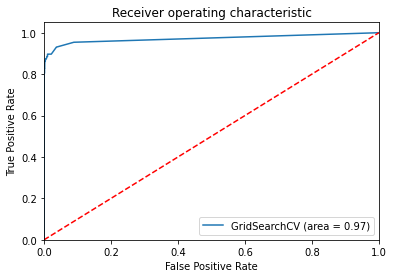

In [0]:
probs = best_rf.predict_proba(X_test_pt)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.85

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.73')

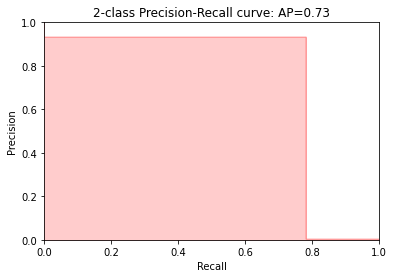

In [0]:
from inspect import signature
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Random Forest model after oversampling gave 85% F1_score with 78% recall and 97% ROC-AUC score. This is better compared to Logistic Regression which after tuning gave only 11% as F1_score. **Also, random oversampling didn't increase the AUC, however the F1_score increased by 5%**

In [0]:
## XGBoost with Random Oversampling

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused varia
model = XGBClassifier(random_state=0)
model.fit(X_resampled,y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict_proba(X_test_pt)

In [0]:
roc_auc = roc_auc_score(y_test,y_pred[:,1])
print(roc_auc)

0.9750599469496022


In [0]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
eval_set = [(X_resampled, y_resampled), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb1.fit(X_resampled,y_resampled, early_stopping_rounds=15, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.038478	validation_0-logloss:0.608577	validation_1-error:0.027194	validation_1-logloss:0.608842
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.030769	validation_0-logloss:0.539513	validation_1-error:0.011973	validation_1-logloss:0.539122
[2]	validation_0-error:0.030575	validation_0-logloss:0.481927	validation_1-error:0.009849	validation_1-logloss:0.480435
[3]	validation_0-error:0.029705	validation_0-logloss:0.436571	validation_1-error:0.005477	validation_1-logloss:0.433781
[4]	validation_0-error:0.029603	validation_0-logloss:0.393703	validation_1-error:0.005161	validation_1-logloss:0.390421
[5]	validation_0-error:0.028509	validation_0-logloss:0.356319	validation_1-error:0.005635	validation_1-logloss:0.352549
[6]	validation_0-error:0.028172	validation_0-logloss:0.325809	validation_1-error:0.004775	validation_1-logloss:0.32

[67]	validation_0-error:0.000765	validation_0-logloss:0.016533	validation_1-error:0.001685	validation_1-logloss:0.017975
[68]	validation_0-error:0.000769	validation_0-logloss:0.016182	validation_1-error:0.001633	validation_1-logloss:0.017585
[69]	validation_0-error:0.000776	validation_0-logloss:0.015508	validation_1-error:0.001598	validation_1-logloss:0.016968
[70]	validation_0-error:0.000745	validation_0-logloss:0.014917	validation_1-error:0.001545	validation_1-logloss:0.016395
[71]	validation_0-error:0.000734	validation_0-logloss:0.014577	validation_1-error:0.001545	validation_1-logloss:0.016077
[72]	validation_0-error:0.000701	validation_0-logloss:0.013886	validation_1-error:0.001562	validation_1-logloss:0.01542
[73]	validation_0-error:0.000633	validation_0-logloss:0.013247	validation_1-error:0.001457	validation_1-logloss:0.014778
[74]	validation_0-error:0.000624	validation_0-logloss:0.012786	validation_1-error:0.001404	validation_1-logloss:0.01434
[75]	validation_0-error:0.000578	v

[135]	validation_0-error:0.00013	validation_0-logloss:0.00252	validation_1-error:0.000597	validation_1-logloss:0.00461
[136]	validation_0-error:0.000123	validation_0-logloss:0.002435	validation_1-error:0.000597	validation_1-logloss:0.004545
[137]	validation_0-error:0.000125	validation_0-logloss:0.002373	validation_1-error:0.000597	validation_1-logloss:0.00449
[138]	validation_0-error:0.000128	validation_0-logloss:0.002321	validation_1-error:0.000597	validation_1-logloss:0.004454
[139]	validation_0-error:0.000125	validation_0-logloss:0.002279	validation_1-error:0.000597	validation_1-logloss:0.004413
[140]	validation_0-error:0.000125	validation_0-logloss:0.00218	validation_1-error:0.000597	validation_1-logloss:0.00432
[141]	validation_0-error:0.000123	validation_0-logloss:0.002125	validation_1-error:0.000614	validation_1-logloss:0.004264
[142]	validation_0-error:0.00011	validation_0-logloss:0.002094	validation_1-error:0.000597	validation_1-logloss:0.004228
[143]	validation_0-error:0.0001

[203]	validation_0-error:3.1e-05	validation_0-logloss:0.000607	validation_1-error:0.000456	validation_1-logloss:0.003194
[204]	validation_0-error:3.1e-05	validation_0-logloss:0.000598	validation_1-error:0.000474	validation_1-logloss:0.003187
[205]	validation_0-error:2.9e-05	validation_0-logloss:0.000587	validation_1-error:0.000474	validation_1-logloss:0.003185
[206]	validation_0-error:2.9e-05	validation_0-logloss:0.000577	validation_1-error:0.000474	validation_1-logloss:0.003188
[207]	validation_0-error:2.4e-05	validation_0-logloss:0.000564	validation_1-error:0.000474	validation_1-logloss:0.003174
[208]	validation_0-error:2.9e-05	validation_0-logloss:0.000557	validation_1-error:0.000474	validation_1-logloss:0.003175
[209]	validation_0-error:2.9e-05	validation_0-logloss:0.000543	validation_1-error:0.000474	validation_1-logloss:0.00317
[210]	validation_0-error:2.6e-05	validation_0-logloss:0.000537	validation_1-error:0.000474	validation_1-logloss:0.003167
[211]	validation_0-error:2.4e-05	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
y_pred = xgb1.predict_proba(X_test_pt)

In [0]:
roc_auc = roc_auc_score(y_test,y_pred[:,1])
print(roc_auc)

0.97528013136289


In [0]:
y_pred = xgb1.predict(X_test_pt)
predictions = [round(value) for value in y_pred]

In [0]:
classification_eval(xgb1,X_test_pt,y_test)

CONFUSION MATRIX
[[56866     9]
 [   18    69]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99968   0.99984   0.99976     56875
           1    0.88462   0.79310   0.83636        87

    accuracy                        0.99953     56962
   macro avg    0.94215   0.89647   0.91806     56962
weighted avg    0.99951   0.99953   0.99951     56962

SCALAR METRICS
    Precision = 0.88462
       Recall = 0.79310
        AUPRC = 0.80662
        AUROC = 0.97528
     Accuracy = 0.99953


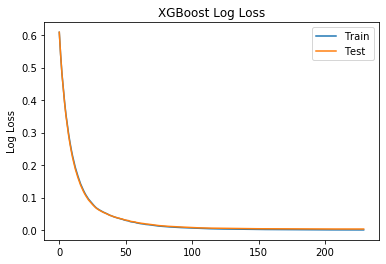

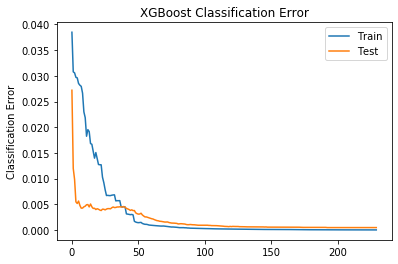

In [0]:
#retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

From the graph we can see that classification error doesn't decrease further after 50 iterations which implies our algorithm isn't learning much..Now let's try to increase the learning rate

In [0]:
xgb2 = XGBClassifier(
 learning_rate =0.3,
 n_estimators=250,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
eval_set = [(X_resampled, y_resampled), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb2.fit(X_resampled,y_resampled, early_stopping_rounds=15, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.038478	validation_0-logloss:0.466546	validation_1-error:0.027194	validation_1-logloss:0.465269
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.021841	validation_0-logloss:0.336019	validation_1-error:0.012394	validation_1-logloss:0.332905
[2]	validation_0-error:0.023303	validation_0-logloss:0.256237	validation_1-error:0.009954	validation_1-logloss:0.250413
[3]	validation_0-error:0.025253	validation_0-logloss:0.204124	validation_1-error:0.006654	validation_1-logloss:0.194872
[4]	validation_0-error:0.017715	validation_0-logloss:0.15928	validation_1-error:0.006496	validation_1-logloss:0.153192
[5]	validation_0-error:0.015439	validation_0-logloss:0.126029	validation_1-error:0.006741	validation_1-logloss:0.12253
[6]	validation_0-error:0.012192	validation_0-logloss:0.103795	validation_1-error:0.005512	validation_1-logloss:0.1003

[67]	validation_0-error:2.9e-05	validation_0-logloss:0.000485	validation_1-error:0.000492	validation_1-logloss:0.003167
[68]	validation_0-error:3.1e-05	validation_0-logloss:0.000461	validation_1-error:0.000492	validation_1-logloss:0.003182
[69]	validation_0-error:2.9e-05	validation_0-logloss:0.000416	validation_1-error:0.000492	validation_1-logloss:0.003165
[70]	validation_0-error:2.4e-05	validation_0-logloss:0.00039	validation_1-error:0.000492	validation_1-logloss:0.003175
[71]	validation_0-error:1.8e-05	validation_0-logloss:0.000357	validation_1-error:0.000509	validation_1-logloss:0.00318
[72]	validation_0-error:1.5e-05	validation_0-logloss:0.000345	validation_1-error:0.000509	validation_1-logloss:0.003194
[73]	validation_0-error:1.3e-05	validation_0-logloss:0.000332	validation_1-error:0.000492	validation_1-logloss:0.003181
[74]	validation_0-error:1.5e-05	validation_0-logloss:0.000324	validation_1-error:0.000492	validation_1-logloss:0.003177
[75]	validation_0-error:1.5e-05	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
classification_eval(xgb2,X_test_pt,y_test)

CONFUSION MATRIX
[[56866     9]
 [   19    68]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99967   0.99984   0.99975     56875
           1    0.88312   0.78161   0.82927        87

    accuracy                        0.99951     56962
   macro avg    0.94139   0.89073   0.91451     56962
weighted avg    0.99949   0.99951   0.99949     56962

SCALAR METRICS
    Precision = 0.88312
       Recall = 0.78161
        AUPRC = 0.81647
        AUROC = 0.98032
     Accuracy = 0.99951


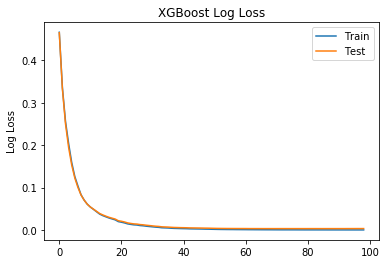

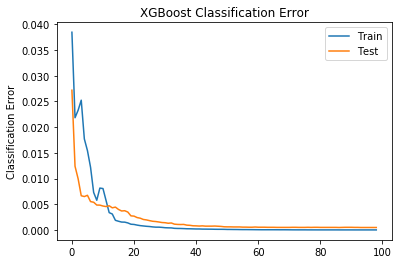

In [0]:
#retrieve performance metrics
results = xgb2.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [0]:
xgb3 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=500,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
eval_set = [(X_resampled, y_resampled), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb3.fit(X_resampled,y_resampled, early_stopping_rounds=15, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.038478	validation_0-logloss:0.533322	validation_1-error:0.027194	validation_1-logloss:0.532867
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.028276	validation_0-logloss:0.425063	validation_1-error:0.007286	validation_1-logloss:0.423034
[2]	validation_0-error:0.028691	validation_0-logloss:0.347454	validation_1-error:0.010516	validation_1-logloss:0.343263
[3]	validation_0-error:0.02999	validation_0-logloss:0.292488	validation_1-error:0.005899	validation_1-logloss:0.286305
[4]	validation_0-error:0.024859	validation_0-logloss:0.244282	validation_1-error:0.005776	validation_1-logloss:0.238617
[5]	validation_0-error:0.021344	validation_0-logloss:0.208291	validation_1-error:0.006197	validation_1-logloss:0.202191
[6]	validation_0-error:0.016169	validation_0-logloss:0.177191	validation_1-error:0.005583	validation_1-logloss:0.171

[67]	validation_0-error:0.000136	validation_0-logloss:0.002677	validation_1-error:0.000667	validation_1-logloss:0.004636
[68]	validation_0-error:0.00013	validation_0-logloss:0.002592	validation_1-error:0.00065	validation_1-logloss:0.004568
[69]	validation_0-error:0.000112	validation_0-logloss:0.002331	validation_1-error:0.000579	validation_1-logloss:0.004316
[70]	validation_0-error:0.000108	validation_0-logloss:0.002232	validation_1-error:0.000597	validation_1-logloss:0.004225
[71]	validation_0-error:0.000103	validation_0-logloss:0.002035	validation_1-error:0.000614	validation_1-logloss:0.004064
[72]	validation_0-error:0.000103	validation_0-logloss:0.00198	validation_1-error:0.000614	validation_1-logloss:0.00401
[73]	validation_0-error:9.7e-05	validation_0-logloss:0.001901	validation_1-error:0.000562	validation_1-logloss:0.003944
[74]	validation_0-error:8.6e-05	validation_0-logloss:0.001819	validation_1-error:0.000562	validation_1-logloss:0.003879
[75]	validation_0-error:7.9e-05	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

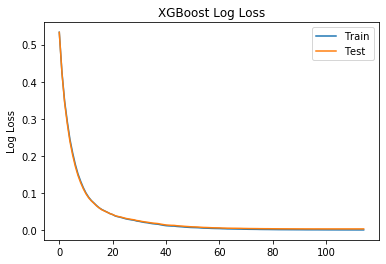

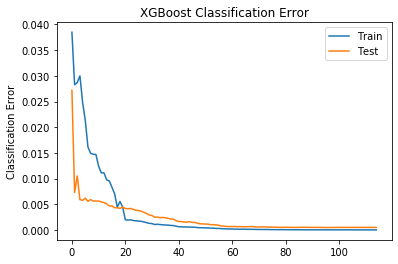

In [0]:
#retrieve performance metrics
results = xgb3.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [0]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=700,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
eval_set = [(X_resampled, y_resampled), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb4.fit(X_resampled,y_resampled, early_stopping_rounds=10, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.038478	validation_0-logloss:0.68406	validation_1-error:0.027194	validation_1-logloss:0.684291
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.032967	validation_0-logloss:0.675053	validation_1-error:0.009691	validation_1-logloss:0.675772
[2]	validation_0-error:0.033541	validation_0-logloss:0.667254	validation_1-error:0.010463	validation_1-logloss:0.667238
[3]	validation_0-error:0.032191	validation_0-logloss:0.659886	validation_1-error:0.00804	validation_1-logloss:0.65952
[4]	validation_0-error:0.030593	validation_0-logloss:0.65156	validation_1-error:0.007163	validation_1-logloss:0.651486
[5]	validation_0-error:0.030929	validation_0-logloss:0.643366	validation_1-error:0.008076	validation_1-logloss:0.643578
[6]	validation_0-error:0.030098	validation_0-logloss:0.635978	validation_1-error:0.00632	validation_1-logloss:0.63588
[

[67]	validation_0-error:0.02764	validation_0-logloss:0.335033	validation_1-error:0.003722	validation_1-logloss:0.331005
[68]	validation_0-error:0.027634	validation_0-logloss:0.331778	validation_1-error:0.003774	validation_1-logloss:0.327811
[69]	validation_0-error:0.027625	validation_0-logloss:0.32866	validation_1-error:0.003669	validation_1-logloss:0.324675
[70]	validation_0-error:0.027614	validation_0-logloss:0.325435	validation_1-error:0.003669	validation_1-logloss:0.321574
[71]	validation_0-error:0.027587	validation_0-logloss:0.322515	validation_1-error:0.003634	validation_1-logloss:0.318478
[72]	validation_0-error:0.027609	validation_0-logloss:0.319577	validation_1-error:0.003669	validation_1-logloss:0.315504
[73]	validation_0-error:0.027598	validation_0-logloss:0.316889	validation_1-error:0.003616	validation_1-logloss:0.312586
[74]	validation_0-error:0.027614	validation_0-logloss:0.313865	validation_1-error:0.003687	validation_1-logloss:0.309593
[75]	validation_0-error:0.026394	v

[135]	validation_0-error:0.018706	validation_0-logloss:0.187637	validation_1-error:0.003388	validation_1-logloss:0.182853
[136]	validation_0-error:0.018691	validation_0-logloss:0.186254	validation_1-error:0.003353	validation_1-logloss:0.181417
[137]	validation_0-error:0.019964	validation_0-logloss:0.184897	validation_1-error:0.003388	validation_1-logloss:0.180014
[138]	validation_0-error:0.018706	validation_0-logloss:0.183469	validation_1-error:0.003388	validation_1-logloss:0.178558
[139]	validation_0-error:0.018704	validation_0-logloss:0.182048	validation_1-error:0.003441	validation_1-logloss:0.177139
[140]	validation_0-error:0.017453	validation_0-logloss:0.180629	validation_1-error:0.003458	validation_1-logloss:0.17574
[141]	validation_0-error:0.017449	validation_0-logloss:0.179079	validation_1-error:0.003476	validation_1-logloss:0.174319
[142]	validation_0-error:0.017462	validation_0-logloss:0.177748	validation_1-error:0.003494	validation_1-logloss:0.172989
[143]	validation_0-error:

[203]	validation_0-error:0.012522	validation_0-logloss:0.114755	validation_1-error:0.003458	validation_1-logloss:0.111302
[204]	validation_0-error:0.012526	validation_0-logloss:0.114117	validation_1-error:0.003423	validation_1-logloss:0.110579
[205]	validation_0-error:0.012531	validation_0-logloss:0.113415	validation_1-error:0.003458	validation_1-logloss:0.109897
[206]	validation_0-error:0.012522	validation_0-logloss:0.112674	validation_1-error:0.003458	validation_1-logloss:0.109211
[207]	validation_0-error:0.01252	validation_0-logloss:0.111907	validation_1-error:0.003441	validation_1-logloss:0.10848
[208]	validation_0-error:0.012531	validation_0-logloss:0.111173	validation_1-error:0.003423	validation_1-logloss:0.107742
[209]	validation_0-error:0.012526	validation_0-logloss:0.11043	validation_1-error:0.003476	validation_1-logloss:0.107055
[210]	validation_0-error:0.012526	validation_0-logloss:0.109693	validation_1-error:0.003494	validation_1-logloss:0.106363
[211]	validation_0-error:0.

[271]	validation_0-error:0.005342	validation_0-logloss:0.075934	validation_1-error:0.00381	validation_1-logloss:0.074081
[272]	validation_0-error:0.005344	validation_0-logloss:0.075615	validation_1-error:0.003845	validation_1-logloss:0.073734
[273]	validation_0-error:0.005351	validation_0-logloss:0.075172	validation_1-error:0.003862	validation_1-logloss:0.073335
[274]	validation_0-error:0.005349	validation_0-logloss:0.074791	validation_1-error:0.003862	validation_1-logloss:0.072978
[275]	validation_0-error:0.005342	validation_0-logloss:0.074427	validation_1-error:0.003862	validation_1-logloss:0.072655
[276]	validation_0-error:0.005335	validation_0-logloss:0.074132	validation_1-error:0.00388	validation_1-logloss:0.07232
[277]	validation_0-error:0.00534	validation_0-logloss:0.073757	validation_1-error:0.00388	validation_1-logloss:0.071989
[278]	validation_0-error:0.005364	validation_0-logloss:0.073438	validation_1-error:0.003897	validation_1-logloss:0.071639
[279]	validation_0-error:0.00

[339]	validation_0-error:0.00541	validation_0-logloss:0.056634	validation_1-error:0.003862	validation_1-logloss:0.055551
[340]	validation_0-error:0.005417	validation_0-logloss:0.056451	validation_1-error:0.003862	validation_1-logloss:0.055357
[341]	validation_0-error:0.005426	validation_0-logloss:0.056243	validation_1-error:0.003845	validation_1-logloss:0.055177
[342]	validation_0-error:0.005423	validation_0-logloss:0.056014	validation_1-error:0.003845	validation_1-logloss:0.054949
[343]	validation_0-error:0.005423	validation_0-logloss:0.055852	validation_1-error:0.003862	validation_1-logloss:0.054777
[344]	validation_0-error:0.005421	validation_0-logloss:0.055648	validation_1-error:0.003862	validation_1-logloss:0.054607
[345]	validation_0-error:0.00543	validation_0-logloss:0.055427	validation_1-error:0.003827	validation_1-logloss:0.054392
[346]	validation_0-error:0.005419	validation_0-logloss:0.055246	validation_1-error:0.003845	validation_1-logloss:0.054203
[347]	validation_0-error:0

[407]	validation_0-error:0.003999	validation_0-logloss:0.043403	validation_1-error:0.003774	validation_1-logloss:0.043101
[408]	validation_0-error:0.003988	validation_0-logloss:0.043231	validation_1-error:0.003757	validation_1-logloss:0.042948
[409]	validation_0-error:0.003997	validation_0-logloss:0.042988	validation_1-error:0.003739	validation_1-logloss:0.042736
[410]	validation_0-error:0.002825	validation_0-logloss:0.042773	validation_1-error:0.003792	validation_1-logloss:0.042537
[411]	validation_0-error:0.004014	validation_0-logloss:0.042559	validation_1-error:0.003774	validation_1-logloss:0.042358
[412]	validation_0-error:0.00284	validation_0-logloss:0.04235	validation_1-error:0.003774	validation_1-logloss:0.042157
[413]	validation_0-error:0.002838	validation_0-logloss:0.042259	validation_1-error:0.003792	validation_1-logloss:0.042059
[414]	validation_0-error:0.002838	validation_0-logloss:0.042134	validation_1-error:0.00381	validation_1-logloss:0.041955
[415]	validation_0-error:0.

[475]	validation_0-error:0.002695	validation_0-logloss:0.034711	validation_1-error:0.003318	validation_1-logloss:0.03512
[476]	validation_0-error:0.002693	validation_0-logloss:0.034625	validation_1-error:0.003318	validation_1-logloss:0.035043
[477]	validation_0-error:0.002684	validation_0-logloss:0.034534	validation_1-error:0.003318	validation_1-logloss:0.034955
[478]	validation_0-error:0.002684	validation_0-logloss:0.034444	validation_1-error:0.003318	validation_1-logloss:0.034861
[479]	validation_0-error:0.002686	validation_0-logloss:0.034339	validation_1-error:0.0033	validation_1-logloss:0.034763
[480]	validation_0-error:0.002684	validation_0-logloss:0.034245	validation_1-error:0.0033	validation_1-logloss:0.034686
[481]	validation_0-error:0.00268	validation_0-logloss:0.034115	validation_1-error:0.0033	validation_1-logloss:0.034564
[482]	validation_0-error:0.002678	validation_0-logloss:0.034018	validation_1-error:0.0033	validation_1-logloss:0.034473
[483]	validation_0-error:0.00268	v

[543]	validation_0-error:0.001227	validation_0-logloss:0.028241	validation_1-error:0.002739	validation_1-logloss:0.029112
[544]	validation_0-error:0.001229	validation_0-logloss:0.028185	validation_1-error:0.002721	validation_1-logloss:0.02906
[545]	validation_0-error:0.001231	validation_0-logloss:0.028044	validation_1-error:0.002739	validation_1-logloss:0.028934
[546]	validation_0-error:0.001233	validation_0-logloss:0.027996	validation_1-error:0.002739	validation_1-logloss:0.028887
[547]	validation_0-error:0.001224	validation_0-logloss:0.027846	validation_1-error:0.002739	validation_1-logloss:0.028749
[548]	validation_0-error:0.001222	validation_0-logloss:0.027746	validation_1-error:0.002739	validation_1-logloss:0.028658
[549]	validation_0-error:0.00122	validation_0-logloss:0.027669	validation_1-error:0.002721	validation_1-logloss:0.028576
[550]	validation_0-error:0.001218	validation_0-logloss:0.027616	validation_1-error:0.002721	validation_1-logloss:0.028522
[551]	validation_0-error:0

[611]	validation_0-error:0.000943	validation_0-logloss:0.022354	validation_1-error:0.002124	validation_1-logloss:0.023573
[612]	validation_0-error:0.000934	validation_0-logloss:0.022229	validation_1-error:0.002124	validation_1-logloss:0.023456
[613]	validation_0-error:0.000921	validation_0-logloss:0.022127	validation_1-error:0.002107	validation_1-logloss:0.023357
[614]	validation_0-error:0.000912	validation_0-logloss:0.022066	validation_1-error:0.002107	validation_1-logloss:0.023299
[615]	validation_0-error:0.000912	validation_0-logloss:0.022024	validation_1-error:0.002107	validation_1-logloss:0.023259
[616]	validation_0-error:0.000915	validation_0-logloss:0.021953	validation_1-error:0.002107	validation_1-logloss:0.023193
[617]	validation_0-error:0.000912	validation_0-logloss:0.021894	validation_1-error:0.002107	validation_1-logloss:0.023132
[618]	validation_0-error:0.000926	validation_0-logloss:0.021785	validation_1-error:0.002107	validation_1-logloss:0.023031
[619]	validation_0-error

[679]	validation_0-error:0.000778	validation_0-logloss:0.01775	validation_1-error:0.001843	validation_1-logloss:0.01925
[680]	validation_0-error:0.000778	validation_0-logloss:0.017692	validation_1-error:0.001843	validation_1-logloss:0.019196
[681]	validation_0-error:0.000778	validation_0-logloss:0.017672	validation_1-error:0.001843	validation_1-logloss:0.019179
[682]	validation_0-error:0.000776	validation_0-logloss:0.017601	validation_1-error:0.001843	validation_1-logloss:0.019111
[683]	validation_0-error:0.000778	validation_0-logloss:0.017553	validation_1-error:0.001843	validation_1-logloss:0.019065
[684]	validation_0-error:0.000776	validation_0-logloss:0.017507	validation_1-error:0.001843	validation_1-logloss:0.019021
[685]	validation_0-error:0.000772	validation_0-logloss:0.017461	validation_1-error:0.001843	validation_1-logloss:0.01898
[686]	validation_0-error:0.000769	validation_0-logloss:0.01737	validation_1-error:0.001826	validation_1-logloss:0.018891
[687]	validation_0-error:0.0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

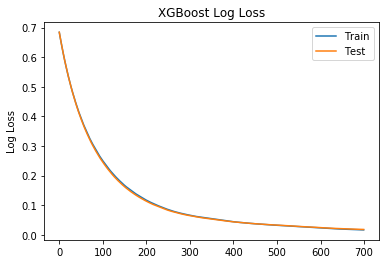

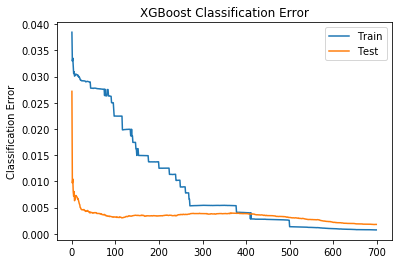

In [0]:
#retrieve performance metrics
results = xgb4.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [0]:
classification_eval(xgb4,X_test_pt,y_test)

CONFUSION MATRIX
[[56789    86]
 [   16    71]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99972   0.99849   0.99910     56875
           1    0.45223   0.81609   0.58197        87

    accuracy                        0.99821     56962
   macro avg    0.72597   0.90729   0.79053     56962
weighted avg    0.99888   0.99821   0.99847     56962

SCALAR METRICS
    Precision = 0.45223
       Recall = 0.81609
        AUPRC = 0.79011
        AUROC = 0.97629
     Accuracy = 0.99821


In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix,roc_auc_score
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('Precision', precision_score(y_test, y_pred)))
        print(format_str % ('Recall', recall_score(y_test, y_pred)))
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))


In [0]:
xgb5 = XGBClassifier(
 learning_rate =0.5,
 n_estimators=700,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
eval_set = [(X_resampled, y_resampled), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb5.fit(X_resampled,y_resampled, early_stopping_rounds=10, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.038478	validation_0-logloss:0.356394	validation_1-error:0.027194	validation_1-logloss:0.353252
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.021768	validation_0-logloss:0.221108	validation_1-error:0.012236	validation_1-logloss:0.214902
[2]	validation_0-error:0.021971	validation_0-logloss:0.148322	validation_1-error:0.010147	validation_1-logloss:0.144699
[3]	validation_0-error:0.016453	validation_0-logloss:0.10973	validation_1-error:0.008795	validation_1-logloss:0.104511
[4]	validation_0-error:0.013184	validation_0-logloss:0.080826	validation_1-error:0.007145	validation_1-logloss:0.07901
[5]	validation_0-error:0.011614	validation_0-logloss:0.065305	validation_1-error:0.006373	validation_1-logloss:0.063177
[6]	validation_0-error:0.007268	validation_0-logloss:0.051469	validation_1-error:0.00718	validation_1-logloss:0.05267

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
classification_eval(xgb5,X_test_pt,y_test)

CONFUSION MATRIX
[[56863    12]
 [   18    69]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99968   0.99979   0.99974     56875
           1    0.85185   0.79310   0.82143        87

    accuracy                        0.99947     56962
   macro avg    0.92577   0.89645   0.91058     56962
weighted avg    0.99946   0.99947   0.99946     56962

SCALAR METRICS
    Precision = 0.85185
       Recall = 0.79310
        AUPRC = 0.82133
        AUROC = 0.97181
     Accuracy = 0.99947


**We can see that among all, a learning rate of 0.3 gave the best AUROC with a decent recall and precision score. So let's consider this learning rate and n_estimators of 100 for performing gridsearch**

In [26]:
## Gridsearch using 0.3 learning rate and N_estimators as 100

from sklearn.model_selection import StratifiedKFold,GridSearchCV

param_grid={ 'max_depth':[2,7,15,20,30],
              'min_child_weight':[1,3,5,9,14]}
kfold = StratifiedKFold(n_splits=3)
# specify model
xgb_model = XGBClassifier(learning_rate=0.3,n_estimators=100)

gridsearch_xgb = GridSearchCV(xgb_model,param_grid=param_grid,cv=kfold,verbose=2,n_jobs=-1)
gridsearch_xgb.fit(X_resampled,y_resampled)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 98.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.3, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 7, 15, 20, 30],
                         'min_child_weight': [1,

In [27]:
gridsearch_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
classification_eval(gridsearch_xgb,X_test_pt,y_test)

CONFUSION MATRIX
[[56868     7]
 [   20    67]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99965   0.99988   0.99976     56875
           1    0.90541   0.77011   0.83230        87

    accuracy                        0.99953     56962
   macro avg    0.95253   0.88500   0.91603     56962
weighted avg    0.99950   0.99953   0.99951     56962

SCALAR METRICS
    Precision = 0.90541
       Recall = 0.77011
        AUPRC = 0.81476
        AUROC = 0.97940
     Accuracy = 0.99953


XGBoost after tuning didn't give a higher recall though the precision increased 

# Oversampling using ***SMOTE***

In [35]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
                     
X_train_pt_1 = pt.fit_transform(X_train_1)     ## Fit the PT on training data
X_test_pt_1 = pt.transform(X_test_1) 

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_sample(X_train_pt,y_train)
pd.value_counts(y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    227440
0    227440
dtype: int64

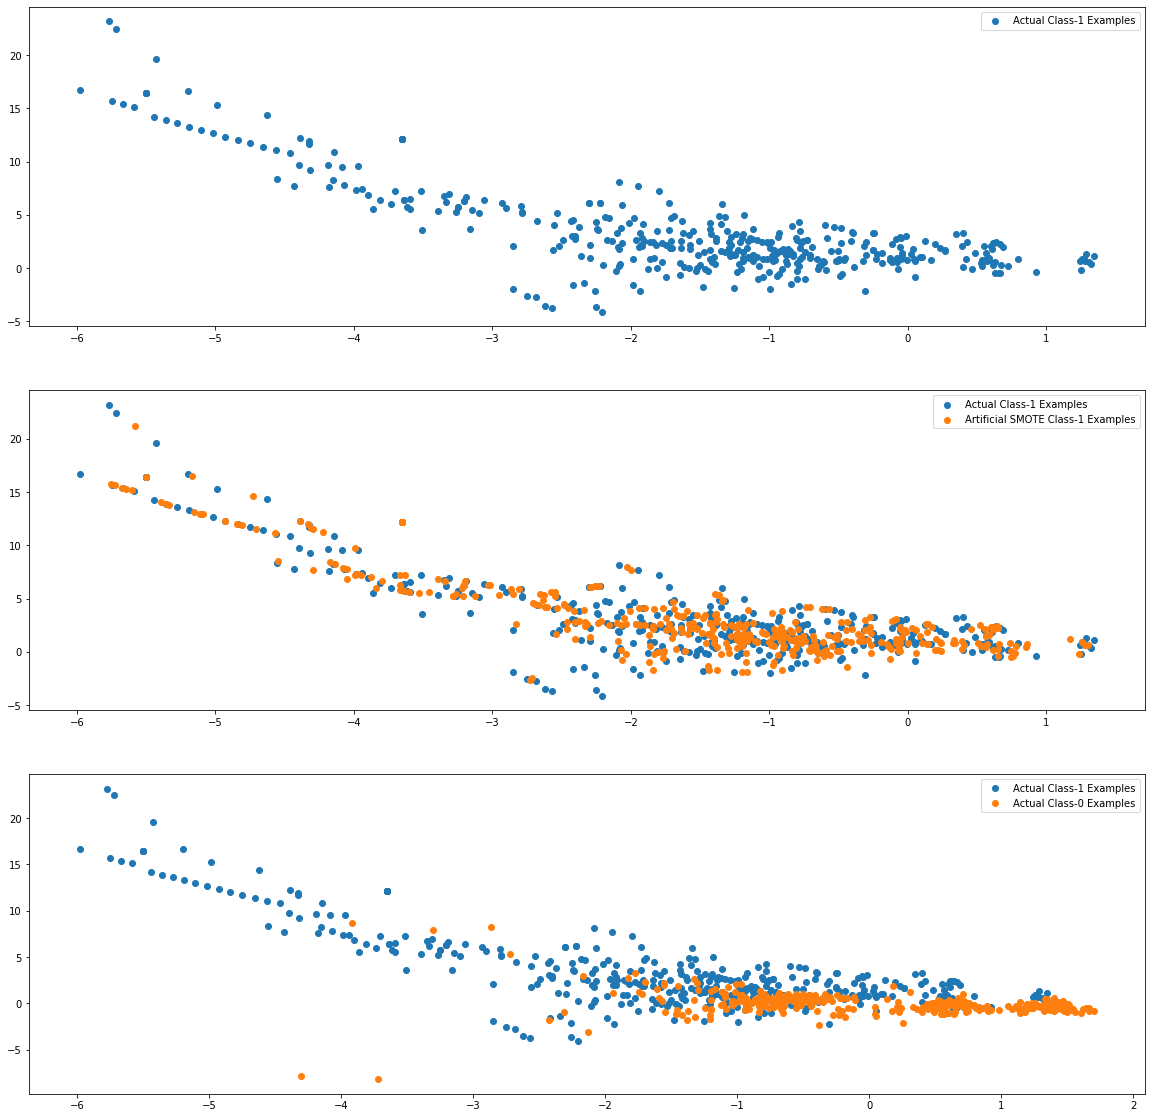

In [36]:
X_train_smote_1 = X_res[X_train_pt.shape[0]:]

X_train_1 = X_train_pt[np.where(y_train==1.0)]
X_train_0 = X_train_pt[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [37]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_res,y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
classification_eval(lgr,X_test_pt,y_test)

CONFUSION MATRIX
[[55563  1312]
 [    9    78]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99984   0.97693   0.98825     56875
           1    0.05612   0.89655   0.10562        87

    accuracy                        0.97681     56962
   macro avg    0.52798   0.93674   0.54694     56962
weighted avg    0.99840   0.97681   0.98690     56962

SCALAR METRICS
    Precision = 0.05612
       Recall = 0.89655
        AUPRC = 0.66405
        AUROC = 0.98885
     Accuracy = 0.97681


In [39]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.power(10.0,np.arange(-5,5)), 'penalty': ['l1','l2']}

LGR = LogisticRegression()

logit_grid = GridSearchCV(LGR,param_grid = param_grid,scoring='average_precision',verbose = True, n_jobs = -1)

best_logit = logit_grid.fit(X_res,y_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [40]:
best_logit.best_estimator_

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
classification_eval(best_logit,X_test_pt,y_test)

CONFUSION MATRIX
[[55564  1311]
 [    9    78]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99984   0.97695   0.98826     56875
           1    0.05616   0.89655   0.10569        87

    accuracy                        0.97683     56962
   macro avg    0.52800   0.93675   0.54698     56962
weighted avg    0.99840   0.97683   0.98691     56962

SCALAR METRICS
    Precision = 0.05616
       Recall = 0.89655
        AUPRC = 0.66406
        AUROC = 0.98886
     Accuracy = 0.97683


In [42]:
## Let's compare it with that of the previous model built before oversampling
lgr_org = LogisticRegression()
lgr_org.fit(X_train_pt,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
classification_eval(lgr_org,X_test_pt,y_test)

CONFUSION MATRIX
[[56867     8]
 [   37    50]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99935   0.99986   0.99960     56875
           1    0.86207   0.57471   0.68966        87

    accuracy                        0.99921     56962
   macro avg    0.93071   0.78729   0.84463     56962
weighted avg    0.99914   0.99921   0.99913     56962

SCALAR METRICS
    Precision = 0.86207
       Recall = 0.57471
        AUPRC = 0.69700
        AUROC = 0.98421
     Accuracy = 0.99921


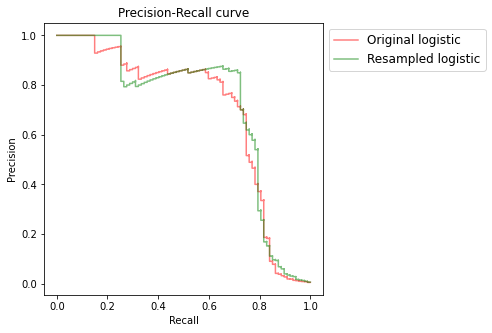

In [46]:
from sklearn.metrics import average_precision_score, precision_recall_curve
pred_prob = best_logit.predict_proba(X_test_pt)
resampled_score = pred_prob[:,1]
average_precision = average_precision_score(y_test, resampled_score)
resampled_precision, resampled_recall, resampled_thresholds = precision_recall_curve(y_test, resampled_score)
plt.figure(figsize=(5,5))
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original logistic')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label='Resampled logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

We can see that after resampling, logistic has the same trend for precision-recall.

### Random Forest after oversampling using SMOTE

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV
param_grid = { 
    'n_estimators' : [200,400,600],
    'max_depth': [15,20,25]
}

clf = RandomForestClassifier(n_jobs=-1)
rand_grid = GridSearchCV(clf,param_grid=param_grid,scoring='average_precision',verbose=2,return_train_score=True)
rand_grid.fit(X_res,y_res)

In [0]:
rand_grid.best_estimator_

In [0]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=400,max_depth=25,n_jobs=-1)

In [49]:
rdf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [50]:
classification_eval(rdf,X_test_pt,y_test)

CONFUSION MATRIX
[[56863    12]
 [   18    69]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99968   0.99979   0.99974     56875
           1    0.85185   0.79310   0.82143        87

    accuracy                        0.99947     56962
   macro avg    0.92577   0.89645   0.91058     56962
weighted avg    0.99946   0.99947   0.99946     56962

SCALAR METRICS
    Precision = 0.85185
       Recall = 0.79310
        AUPRC = 0.78493
        AUROC = 0.97916
     Accuracy = 0.99947


In [51]:
rf_org = RandomForestClassifier(n_estimators=300,max_depth=15,n_jobs=-1)
rf_org.fit(X_train_pt,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [52]:
classification_eval(rf_org,X_test_pt,y_test)

CONFUSION MATRIX
[[56870     5]
 [   21    66]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99963   0.99991   0.99977     56875
           1    0.92958   0.75862   0.83544        87

    accuracy                        0.99954     56962
   macro avg    0.96460   0.87927   0.91761     56962
weighted avg    0.99952   0.99954   0.99952     56962

SCALAR METRICS
    Precision = 0.92958
       Recall = 0.75862
        AUPRC = 0.79810
        AUROC = 0.98310
     Accuracy = 0.99954


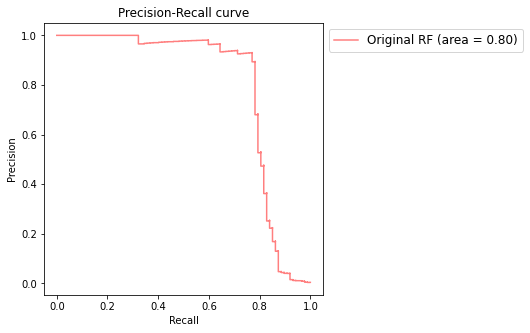

In [53]:
from sklearn.metrics import average_precision_score, precision_recall_curve
pred_prob = rf_org.predict_proba(X_test_pt)
y_score = pred_prob[:,1]
average_precision = average_precision_score(y_test, y_score)
original_precision, original_recall, original_thresholds = precision_recall_curve(y_test, y_score)
plt.figure(figsize=(5,5))
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original RF (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

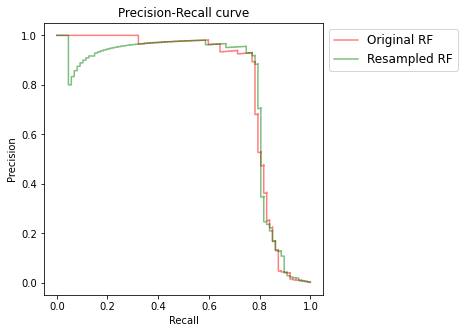

In [54]:
pred_prob = rdf.predict_proba(X_test_pt)
resampled_score = pred_prob[:,1]
average_precision = average_precision_score(y_test, resampled_score)
resampled_precision, resampled_recall, resampled_thresholds = precision_recall_curve(y_test, resampled_score)
plt.figure(figsize=(5,5))
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original RF')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label='Resampled RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

The precision-recall curve follows closely the same with and without resampling

### XGBoost Classifier using SMOTE oversampling

In [0]:
xgb1 = XGBClassifier(
 learning_rate =0.15,
 n_estimators=400,
 max_depth=5, 
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [63]:
eval_set = [(X_res, y_res), (X_test_pt, y_test)]
eval_metric = ["error","logloss"]
xgb2.fit(X_res,y_res, early_stopping_rounds=10, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.046408	validation_0-logloss:0.472585	validation_1-error:0.0418	validation_1-logloss:0.470665
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.041046	validation_0-logloss:0.348932	validation_1-error:0.014729	validation_1-logloss:0.343306
[2]	validation_0-error:0.040765	validation_0-logloss:0.269719	validation_1-error:0.010375	validation_1-logloss:0.262119
[3]	validation_0-error:0.036016	validation_0-logloss:0.219427	validation_1-error:0.012359	validation_1-logloss:0.208229
[4]	validation_0-error:0.036192	validation_0-logloss:0.182381	validation_1-error:0.012868	validation_1-logloss:0.170337
[5]	validation_0-error:0.033207	validation_0-logloss:0.153255	validation_1-error:0.013237	validation_1-logloss:0.142031
[6]	validation_0-error:0.033877	validation_0-logloss:0.134143	validation_1-error:0.012061	validation_1-logloss:0.1226

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [57]:
classification_eval(xgb1,X_test_pt,y_test)

CONFUSION MATRIX
[[56849    26]
 [   19    68]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99967   0.99954   0.99960     56875
           1    0.72340   0.78161   0.75138        87

    accuracy                        0.99921     56962
   macro avg    0.86154   0.89058   0.87549     56962
weighted avg    0.99924   0.99921   0.99923     56962

SCALAR METRICS
    Precision = 0.72340
       Recall = 0.78161
        AUPRC = 0.81557
        AUROC = 0.97894
     Accuracy = 0.99921


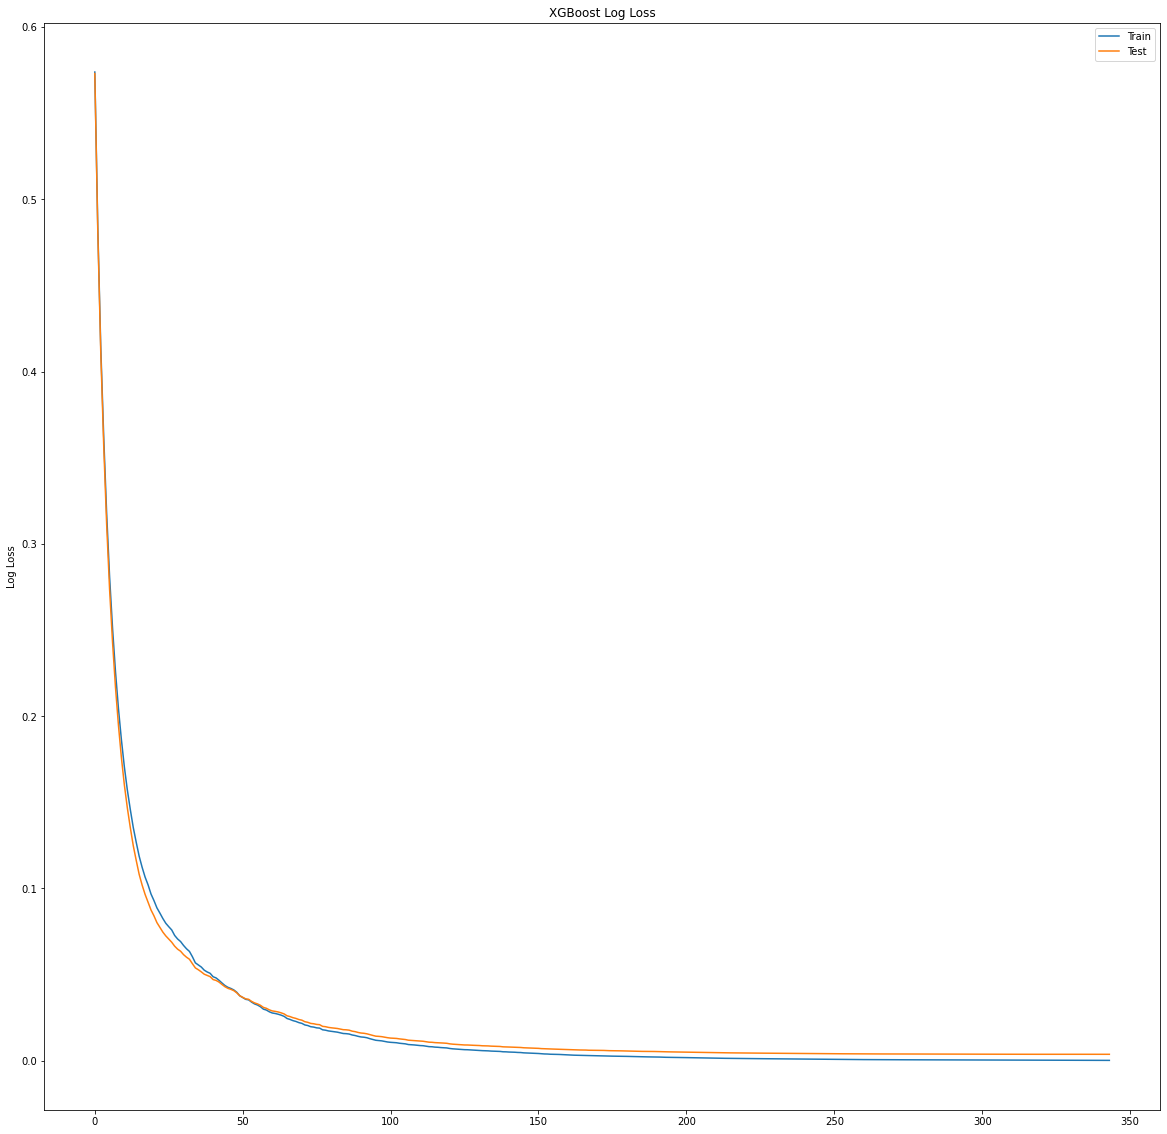

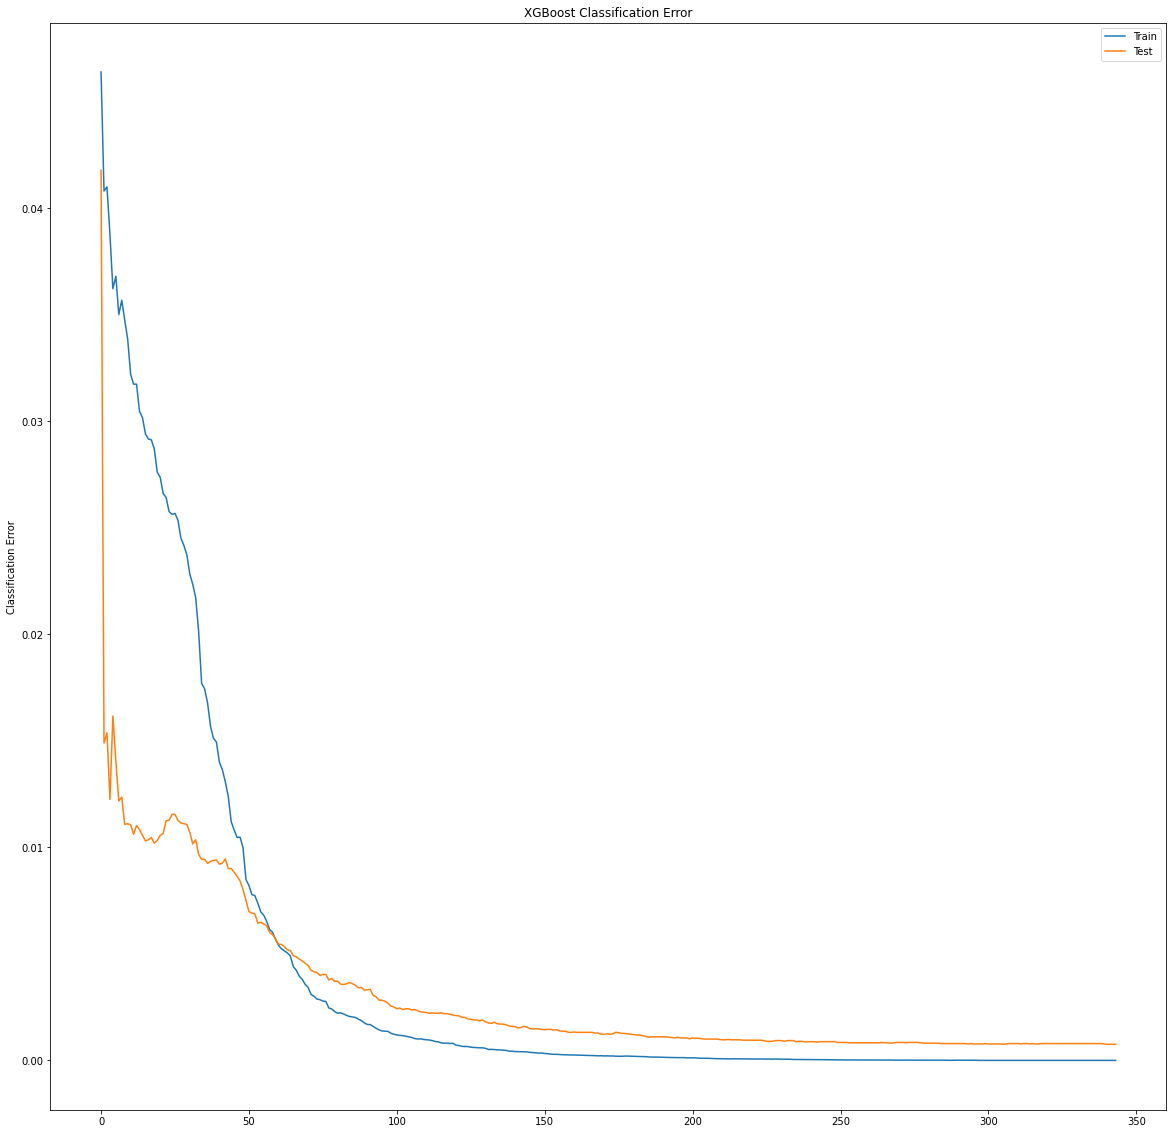

In [59]:
#retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

We can see the error stabilized after 150 iterations and training stopped after 334 iterations. So, the algorithm in its first attempt has done a decent job. The AUCROC is 95% and F1_score is 75%.


Using this to train XGB with Gridsearch. Below are images attached after Grid search

<img src="Xgboost_SMOTE_tuning_1.png">






<img src="Xgboost_SMOTE_tuning_3.png">


<img src="Xgboost_SMOTE_tuning_4.png">
<img src="Xgboost_SMOTE_tuning_5.png">

pred_prob = xgb_smote.predict_proba(X_test_pt)
resampled_score = pred_prob[:,1]
average_precision = average_precision_score(y_test, resampled_score)
resampled_precision, resampled_recall, resampled_thresholds = precision_recall_curve(y_test, resampled_score)
plt.figure(figsize=(5,5))
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original XGBoost')
plt.step(resampled_recall, resampled_precision, color='green', alpha=0.5,linewidth=1.5,label='Resampled XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

<img src= "XGB_comparison with original model.png">

We see that the AUROC score has increased to 98% with the F1_score still as 75%

### SUMMARY

After running the model on the unsampled and oversampled data, we have these few conclusions
1.) Huge difference isn't seen in the AUC-ROC score for the actual data and the oversampled data for all models. 

Especially, Random Forests and XGBoost show minor difference in the AUC_ROC score.
This can be due to the fact that there are very less fradulent transactions (1%). 
And using the data of 1% and making it to 50% by linear combinations/ random oversampling isn't affecting the results much.
However on deep diving we see differences in Precision and Recall scores for each of the models.
Logistic regression after oversampling had the highest recall but a very poor precision (~11%). This implies it was classifying almost all data points as fraud. Though this will avoid risk of losing fradulent transactions, classifying all of them as non-fraud will only increase the pain of following up for the executives.
We need a balanced precision and recall. And if any, the recall can be slightly higher with the highest AUC-ROC score.



**Among all models, XGBoost after SMOTE outperforms other models in terms of training time as well the AUC-ROC score as well as AUPRC score and can be considered for model building. Random Forests has the same recall but took 10x time compared to XGBoost to train and give an output after hyperparamater tuning.
Thus the most robust and effectuve model is XGBoost after SMOTE oversampling**